In [16]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers
from keras.utils.vis_utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["PATH"] += os.pathsep + 'H:/Program Files (x86)/Graphviz2.38/bin/'

In [17]:
#size of encoded representations
# if input 784/32 = 24.5 compression factor
encoding_dim = 32
# input placeholder
input_img = Input(shape=(784,))
# encoded representation of input eg 32 dim
# encoded = Dense(encoding_dim, activation='relu')(input_img)
# add dense layer with L1 activity regularizer
encoded1 = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-8))(input_img)
# lossy reconstruction of input
decoded1 = Dense(784, activation='sigmoid')(encoded1)

## Autoencoder Model
# maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded1)
## Encoder Model
# maps input to encoded representation
encoder1 = Model(input_img, encoded1)
## Decoder Model
encoded_input = Input(shape=(encoding_dim,))
# last layer of autoencoder model
decoder_layer = autoencoder1.layers[-1]
# decoder model
decoder1 = Model(encoded_input, decoder_layer(encoded_input))

In [18]:
# configure model to use per pixel binary crossentropy loss and Adadelta optimizer
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()
# normalize values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# flatten 28x28 to 1x784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [19]:
# train autoencoder for 100 epochs
autoencoder1.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.3645 - val_loss: 0.2735
Epoch 2/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2665 - val_loss: 0.2563
Epoch 3/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2458 - val_loss: 0.2333
Epoch 4/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2247 - val_loss: 0.2146
Epoch 5/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2095 - val_loss: 0.2023
Epoch 6/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1992 - val_loss: 0.1934
Epoch 7/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1911 - val_loss: 0.1860
Epoch 8/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1844 - val_loss: 0.1800
Epoch 9/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1788 - val_loss: 0.1748
Epoch

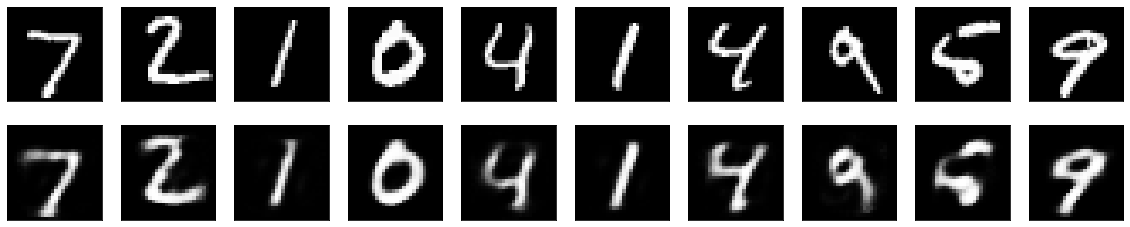

In [20]:
def plot_encdec(encoder, decoder):

    # encode and decode some digits
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
plot_encdec(encoder1, decoder1)

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_47 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_48 (Dense)             (None, 784)               101

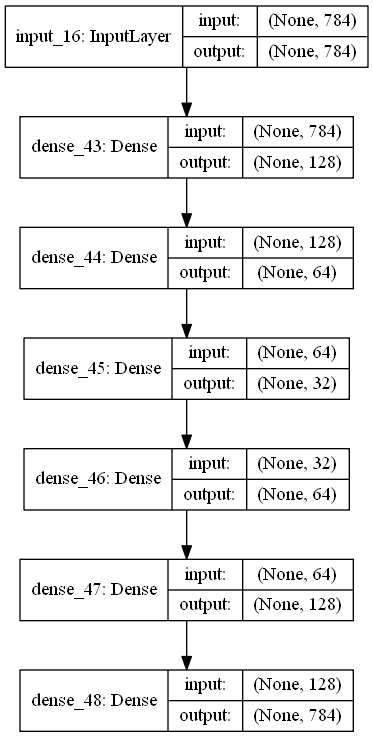

In [26]:
# Deep Autoencoder
# just add more layers
input_img = Input(shape=(784,))
encoded2 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(64, activation='relu')(encoded2)
encoded2 = Dense(32, activation='relu')(encoded2)

decoded2 = Dense(64, activation='relu')(encoded2)
decoded2 = Dense(128, activation='relu')(decoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded2)

autoencoder2 = Model(input_img, decoded2)
autoencoder2.compile(optimizer='adadelta', loss='binary_crossentropy')
print(autoencoder2.summary())
plot_model(autoencoder2, show_shapes=True, show_layer_names=True)

In [27]:
autoencoder2.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.3398 - val_loss: 0.2618
Epoch 2/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.2520 - val_loss: 0.2418
Epoch 3/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.2325 - val_loss: 0.2243
Epoch 4/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2187 - val_loss: 0.2080
Epoch 5/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.2005 - val_loss: 0.1950
Epoch 6/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1897 - val_loss: 0.1839
Epoch 7/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1823 - val_loss: 0.1787
Epoch 8/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.1764 - val_loss: 0.1719
Epoch 9/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1702 - val_loss: 0.1

Epoch 77/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.1032 - val_loss: 0.1021
Epoch 78/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.1028 - val_loss: 0.1043
Epoch 79/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1027 - val_loss: 0.1022
Epoch 80/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1025 - val_loss: 0.1001
Epoch 81/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1022 - val_loss: 0.1004
Epoch 82/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.1020 - val_loss: 0.1010
Epoch 83/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.1018 - val_loss: 0.1013
Epoch 84/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1016 - val_loss: 0.0999
Epoch 85/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1014 - val_loss: 0.1000
Epoch 86/100
60000/60000 [===========

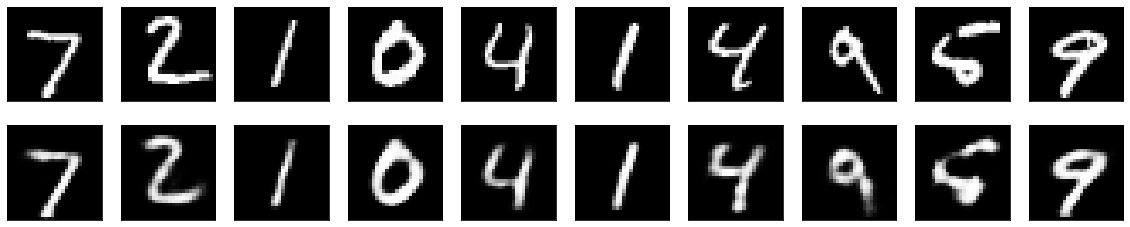

In [33]:
# maps input to encoded representation
encoder2 = Model(input_img, encoded2)
## Decoder Model
encoded_input = Input(shape=(encoding_dim,))
# since the dimensions of the layer inputs are different
# for multiple layers, we need to reconstruct the decoder
# by rebuilding the graph from the first to the last decoder layer
decoder_layers = autoencoder2.layers[-3](encoded_input)
decoder_layers = autoencoder2.layers[-2](decoder_layers)
decoder_layers = autoencoder2.layers[-1](decoder_layers)
# decoder model
decoder2 = Model(encoded_input, decoder_layers)

plot_encdec(encoder2,decoder2)